# How to analyse EnergyPlus simulation results using Python

## Import libraries 

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import matplotlib.patches as mpatches 


## Create a parser for datetime strings in the 'eplusout.csv' file

In [2]:
def parse_energyplus_datetime_string(st, year=2022):
    st=st.strip()
    month=int(st[0:2])
    day=int(st[3:5])
    hour=int(st[7:9])
    minute=int(st[10:12])
    second=(st[13:15])
    if not hour==24:
        dt=pd.Timestamp(year,month,day,hour,minute)
    else:
        hour=0
        dt=pd.Timestamp(year,month,day,hour,minute)
        dt+=pd.Timedelta('1 day')
    return dt

#This changes the Date/Time format from 'MM-dd HH:mm:ss' to 'yyyy-MM-dd HH:mm:ss'

## Read data from 'eplusout.csv' file

In [3]:
dataframe = pd.read_csv('eplusout.csv',
                   parse_dates=[0],
                   index_col=[0],
                   date_parser=parse_energyplus_datetime_string  #parses the date strings using the function defined above
                  )
dataframe

,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),Environment:Site Total Sky Cover [](Hourly),Environment:Site Opaque Sky Cover [](Hourly),Environment:Site Daylight Saving Time Status [](Daily),Environment:Site Day Type Index [](Daily),ZONE ONE:Zone Total Internal Latent Gain Energy [J](Hourly),TEST 352A:Other Equipment Total Heating Energy [J](Monthly),TEST 352 MINUS:Other Equipment Total Heating Energy [J](Monthly),ZONE ONE:Zone Other Equipment Total Heating Energy [J](Monthly),ZONE ONE:Zone Mean Radiant Temperature [C](Hourly),...,ZN001:FLR001:Surface Inside Face Temperature [C](Daily),ZN001:FLR001:Surface Outside Face Temperature [C](Daily),ZN001:FLR001:Surface Inside Face Convection Heat Transfer Coefficient [W/m2-K](Daily),ZN001:ROOF001:Surface Inside Face Temperature [C](Daily),ZN001:ROOF001:Surface Outside Face Temperature [C](Daily),ZN001:ROOF001:Surface Inside Face Convection Heat Transfer Coefficient [W/m2-K](Daily),ZN001:ROOF001:Surface Outside Face Convection Heat Transfer Coefficient [W/m2-K](Daily),ZONE ONE:Zone Mean Air Temperature [C](Hourly),ZONE ONE:Zone Air Heat Balance Surface Convection Rate [W](Hourly),ZONE ONE:Zone Air Heat Balance Air Energy Storage Rate [W](Hourly)
Date/Time,,,,,,,,,,,,,,,,,,,,,
2022-12-21 01:00:00,-15.5000,1.250,1.250,NaN,NaN,0.0,NaN,NaN,NaN,-18.208257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.210958,-0.035919,-0.035990
2022-12-21 02:00:00,-15.5000,3.250,3.250,NaN,NaN,0.0,NaN,NaN,NaN,-18.208346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.211045,-0.035356,-0.035426
2022-12-21 03:00:00,-15.5000,3.375,3.375,NaN,NaN,0.0,NaN,NaN,NaN,-18.208434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.211130,-0.034802,-0.034871
2022-12-21 04:00:00,-15.5000,1.125,1.125,NaN,NaN,0.0,NaN,NaN,NaN,-18.208520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.211214,-0.034256,-0.034324
2022-12-21 05:00:00,-15.5000,1.875,1.875,NaN,NaN,0.0,NaN,NaN,NaN,-18.208604,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.211297,-0.033719,-0.033786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 20:00:00,13.1125,7.750,7.750,NaN,NaN,0.0,NaN,NaN,NaN,12.867497,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.881426,-2.833969,-2.655966
2022-12-31 21:00:00,12.6125,5.750,5.750,NaN,NaN,0.0,NaN,NaN,NaN,12.754285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.833573,-42.168068,-34.177869
2022-12-31 22:00:00,11.2000,5.000,5.000,NaN,NaN,0.0,NaN,NaN,NaN,12.575910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.676638,-63.531609,-64.006179


## Analyse the results by graph plotting

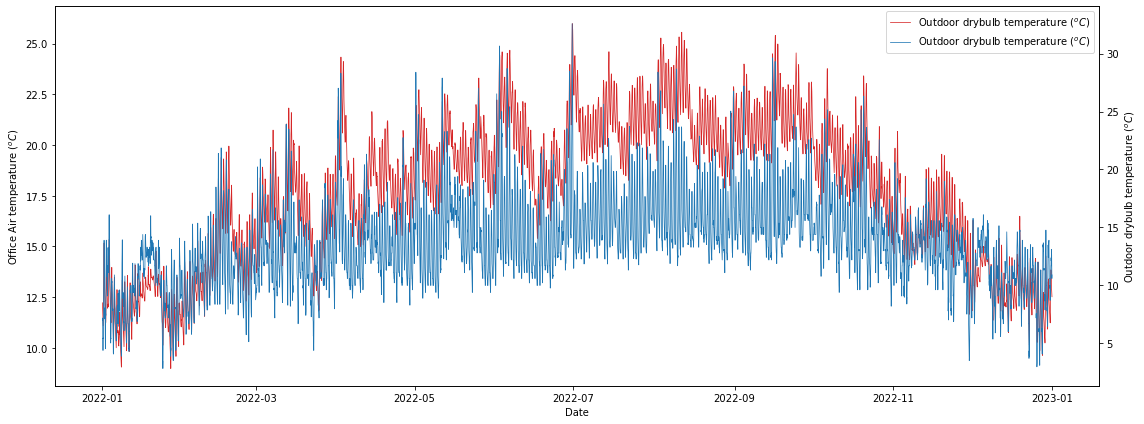

Figure 1: Time series plot of hourly mean air temperatures in Office RT.216, Sir Frank Gibb Building and Outdoor drybulb temperature


In [17]:
fig, ax1 = plt.subplots(figsize=(16,6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Office Air temperature (${^o}C$)')
l1,=ax1.plot(dataframe['ZONE ONE:Zone Mean Air Temperature [C](Hourly)'][48:], color=color, linewidth=0.75)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() #initiates a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Outdoor drybulb temperature (${^o}C$)')
l2,=ax2.plot(dataframe['Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)'][48:], color=color, linewidth=0.75)
ax2.tick_params(axis='y')

plt.legend([l1,l2],['Outdoor drybulb temperature (${^o}C$)','Outdoor drybulb temperature (${^o}C$)'])

fig.tight_layout() 
plt.show()
print('Figure 1: Time series plot of hourly mean air temperatures in Office RT.216, Sir Frank Gibb Building and Outdoor drybulb temperature')